[Explanation vis](https://mlu-explain.github.io/decision-tree/)

- decision tree is a series of Yes/No

- if u think about decision tree, think about hierarecy/brances

- node is caring of condition



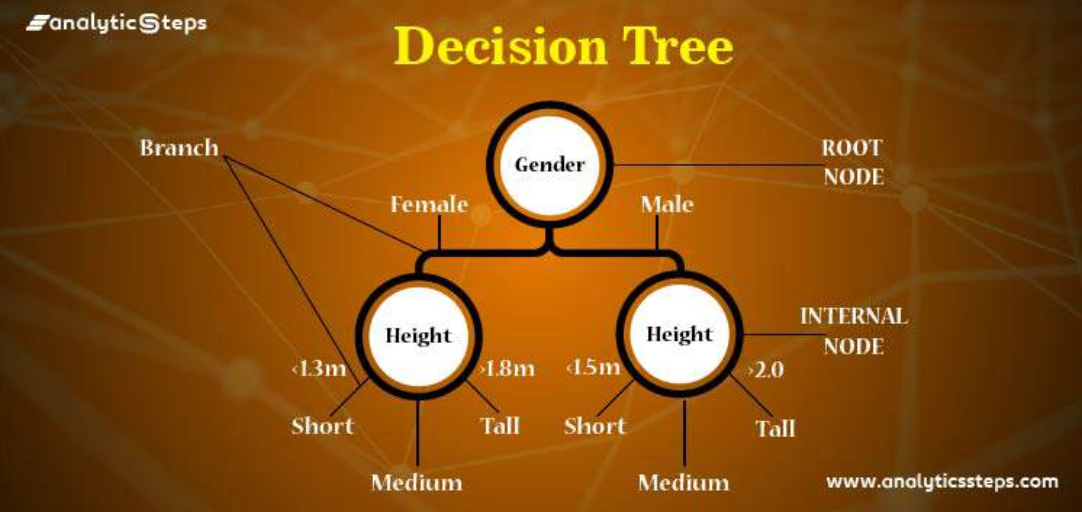

-----

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 

In [3]:
titanic = sns.load_dataset('titanic')
titanic = pd.DataFrame(titanic)

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
x,y = pd.factorize(titanic['survived'])
titanic['survived_code'] = x

In [6]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,survived_code
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,0
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,1


In [7]:
x = titanic[['fare']]
y = titanic['survived_code']

In [8]:
model_dt = DecisionTreeClassifier()
model_lr = LogisticRegression()

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state= 42, test_size= 0.2)

model_dt.fit(x_train,y_train)
model_lr.fit(x_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [10]:
y_pred_dt = model_dt.predict(x_test)
y_pred_lr = model_lr.predict(x_test)

In [11]:
# Very great report for model 

cr_dt = classification_report(y_test,y_pred_dt)         
cr_lr = classification_report(y_test,y_pred_lr)
print(cr_dt,cr_lr)

              precision    recall  f1-score   support

           0       0.70      0.84      0.76       105
           1       0.68      0.49      0.57        74

    accuracy                           0.69       179
   macro avg       0.69      0.66      0.66       179
weighted avg       0.69      0.69      0.68       179
               precision    recall  f1-score   support

           0       0.64      0.95      0.76       105
           1       0.77      0.23      0.35        74

    accuracy                           0.65       179
   macro avg       0.70      0.59      0.56       179
weighted avg       0.69      0.65      0.59       179



In [12]:
titanic['fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: fare, Length: 891, dtype: float64

[Text(0.45535714285714285, 0.9, 'fare <= 10.481\ngini = 0.469\nsamples = 712\nvalue = [444, 268]\nclass = No'),
 Text(0.19642857142857142, 0.7, 'fare <= 7.133\ngini = 0.321\nsamples = 274\nvalue = [219, 55]\nclass = No'),
 Text(0.32589285714285715, 0.8, 'True  '),
 Text(0.10714285714285714, 0.5, 'fare <= 7.013\ngini = 0.114\nsamples = 33\nvalue = [31, 2]\nclass = No'),
 Text(0.07142857142857142, 0.3, 'fare <= 6.962\ngini = 0.142\nsamples = 26\nvalue = [24, 2]\nclass = No'),
 Text(0.03571428571428571, 0.1, '\n  (...)  \n'),
 Text(0.10714285714285714, 0.1, '\n  (...)  \n'),
 Text(0.14285714285714285, 0.3, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]\nclass = No'),
 Text(0.2857142857142857, 0.5, 'fare <= 7.883\ngini = 0.343\nsamples = 241\nvalue = [188, 53]\nclass = No'),
 Text(0.21428571428571427, 0.3, 'fare <= 7.867\ngini = 0.415\nsamples = 109\nvalue = [77, 32]\nclass = No'),
 Text(0.17857142857142858, 0.1, '\n  (...)  \n'),
 Text(0.25, 0.1, '\n  (...)  \n'),
 Text(0.35714285714285715, 0.3

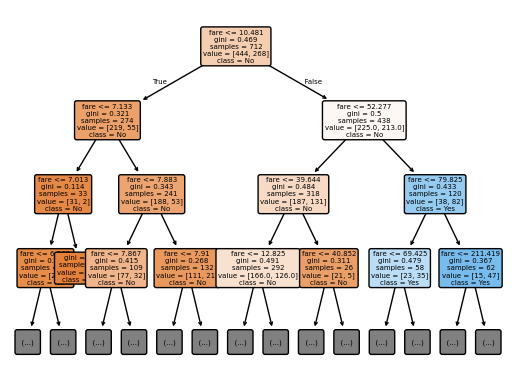

In [39]:
plt.Figure(figsize=(25,16), dpi=300)
plot_tree(model_dt, 
          feature_names=['fare'], 
          class_names=['No', 'Yes'], 
          max_depth=3,
           filled=True,
            rounded=True,
             fontsize=5 )

[Text(0.5, 0.875, 'fare <= 10.481\ngini = 0.469\nsamples = 712\nvalue = [444, 268]\nclass = no'),
 Text(0.25, 0.625, 'fare <= 7.133\ngini = 0.321\nsamples = 274\nvalue = [219, 55]\nclass = no'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'fare <= 7.013\ngini = 0.114\nsamples = 33\nvalue = [31, 2]\nclass = no'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'fare <= 7.883\ngini = 0.343\nsamples = 241\nvalue = [188, 53]\nclass = no'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'fare <= 52.277\ngini = 0.5\nsamples = 438\nvalue = [225.0, 213.0]\nclass = no'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'fare <= 39.644\ngini = 0.484\nsamples = 318\nvalue = [187, 131]\nclass = no'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'fare <= 79.825\ngini = 0.433\nsamples = 120\nvalue = [38, 82]\nclass = yes'),
 Text(0.8125, 0.1

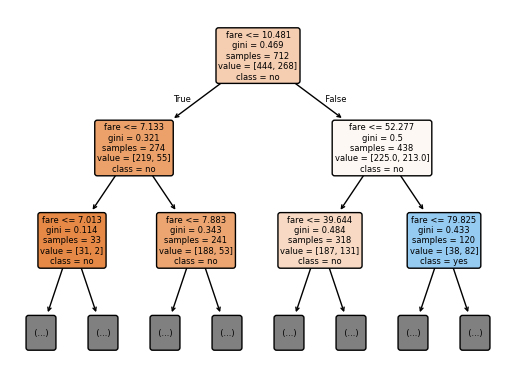

In [35]:
plt.Figure(figsize=(25,16), dpi=300)
plot_tree(model_dt, 
          feature_names=['fare'], 
          class_names=titanic['alive'], 
          max_depth=2,
           filled=True,
            rounded=True,
             fontsize=6 )



